In [1]:
#https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

In [2]:
13*365

4745

In [36]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [37]:
feature_df=pd.read_excel('housing_pred_init_col_walkthrough.xlsx')

In [38]:
feature_df.head()

,column,type,importance
0,MSSubClass,cat,high
1,MSZoning,cat,high
2,LotFrontage,float,medium
3,LotArea,float,medium
4,Street,cat,medium


In [39]:
feature_df=feature_df.loc[feature_df.importance=='high']
feature_df.shape

(24, 3)

In [40]:
features_chosen=feature_df.column.values
features_chosen

array(['MSSubClass', 'MSZoning', 'Alley', 'Utilities', 'Neighborhood',
       'Condition1', 'Condition2', 'HouseStyle', 'OverallQual',
       'OverallCond', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'GarageType', 'MiscFeature', 'SalePrice'], dtype=object)

In [41]:
train=pd.read_csv('train.csv')
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
train.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [43]:
train=train[features_chosen]
train.shape

(1460, 24)

In [44]:
train.head()

,MSSubClass,MSZoning,Alley,Utilities,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,MiscFeature,SalePrice
0,60,RL,NaN,AllPub,CollgCr,Norm,Norm,2Story,7,5,SBrkr,856,854,0,1710,1,3,1,Gd,8,Typ,Attchd,NaN,208500
1,20,RL,NaN,AllPub,Veenker,Feedr,Norm,1Story,6,8,SBrkr,1262,0,0,1262,0,3,1,TA,6,Typ,Attchd,NaN,181500
2,60,RL,NaN,AllPub,CollgCr,Norm,Norm,2Story,7,5,SBrkr,920,866,0,1786,1,3,1,Gd,6,Typ,Attchd,NaN,223500
3,70,RL,NaN,AllPub,Crawfor,Norm,Norm,2Story,7,5,SBrkr,961,756,0,1717,1,3,1,Gd,7,Typ,Detchd,NaN,140000
4,60,RL,NaN,AllPub,NoRidge,Norm,Norm,2Story,8,5,SBrkr,1145,1053,0,2198,1,4,1,Gd,9,Typ,Attchd,NaN,250000


In [45]:
train.isnull().sum()/train.shape[0]

MSSubClass      0.000000
MSZoning        0.000000
Alley           0.937671
Utilities       0.000000
Neighborhood    0.000000
Condition1      0.000000
Condition2      0.000000
HouseStyle      0.000000
OverallQual     0.000000
OverallCond     0.000000
Electrical      0.000685
1stFlrSF        0.000000
2ndFlrSF        0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Functional      0.000000
GarageType      0.055479
MiscFeature     0.963014
SalePrice       0.000000
dtype: float64

In [46]:
train.drop(columns=['Alley','MiscFeature'],inplace=True)

In [47]:
train.isnull().sum()/train.shape[0]

MSSubClass      0.000000
MSZoning        0.000000
Utilities       0.000000
Neighborhood    0.000000
Condition1      0.000000
Condition2      0.000000
HouseStyle      0.000000
OverallQual     0.000000
OverallCond     0.000000
Electrical      0.000685
1stFlrSF        0.000000
2ndFlrSF        0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Functional      0.000000
GarageType      0.055479
SalePrice       0.000000
dtype: float64

In [48]:
train.describe()

,MSSubClass,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1162.626712,346.992466,5.844521,1515.463699,0.425342,2.866438,1.046575,6.517808,180921.195890
std,42.300571,1.382997,1.112799,386.587738,436.528436,48.623081,525.480383,0.518911,0.815778,0.220338,1.625393,79442.502883
min,20.000000,1.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,34900.000000
25%,20.000000,5.000000,5.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,2.000000,1.000000,5.000000,129975.000000
50%,50.000000,6.000000,5.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,3.000000,1.000000,6.000000,163000.000000
75%,70.000000,7.000000,6.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,3.000000,1.000000,7.000000,214000.000000
max,190.000000,10.000000,9.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,8.000000,3.000000,14.000000,755000.000000


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   Utilities     1460 non-null   object
 3   Neighborhood  1460 non-null   object
 4   Condition1    1460 non-null   object
 5   Condition2    1460 non-null   object
 6   HouseStyle    1460 non-null   object
 7   OverallQual   1460 non-null   int64 
 8   OverallCond   1460 non-null   int64 
 9   Electrical    1459 non-null   object
 10  1stFlrSF      1460 non-null   int64 
 11  2ndFlrSF      1460 non-null   int64 
 12  LowQualFinSF  1460 non-null   int64 
 13  GrLivArea     1460 non-null   int64 
 14  BsmtFullBath  1460 non-null   int64 
 15  BedroomAbvGr  1460 non-null   int64 
 16  KitchenAbvGr  1460 non-null   int64 
 17  KitchenQual   1460 non-null   object
 18  TotRmsAbvGrd  1460 non-null   int64 
 19  Functi

In [50]:
#Cat columns

#MSSubClass:Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [51]:
train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

#MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [52]:
# Numerical values

In [53]:
train.head()

,MSSubClass,MSZoning,Utilities,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,SalePrice
0,60,RL,AllPub,CollgCr,Norm,Norm,2Story,7,5,SBrkr,856,854,0,1710,1,3,1,Gd,8,Typ,Attchd,208500
1,20,RL,AllPub,Veenker,Feedr,Norm,1Story,6,8,SBrkr,1262,0,0,1262,0,3,1,TA,6,Typ,Attchd,181500
2,60,RL,AllPub,CollgCr,Norm,Norm,2Story,7,5,SBrkr,920,866,0,1786,1,3,1,Gd,6,Typ,Attchd,223500
3,70,RL,AllPub,Crawfor,Norm,Norm,2Story,7,5,SBrkr,961,756,0,1717,1,3,1,Gd,7,Typ,Detchd,140000
4,60,RL,AllPub,NoRidge,Norm,Norm,2Story,8,5,SBrkr,1145,1053,0,2198,1,4,1,Gd,9,Typ,Attchd,250000


In [55]:
#1stFlrSF
train['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

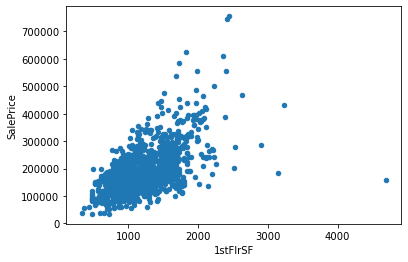

In [56]:
train.plot.scatter(x='1stFlrSF',y='SalePrice')

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

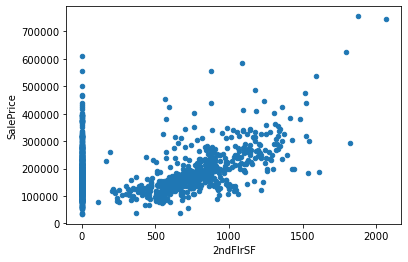

In [57]:
#2ndFlrSF
train.plot.scatter(x='2ndFlrSF',y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

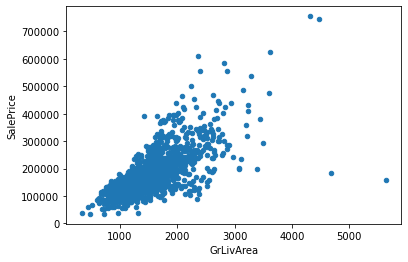

In [58]:
#GrLivArea
train.plot.scatter(x='GrLivArea',y='SalePrice')

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

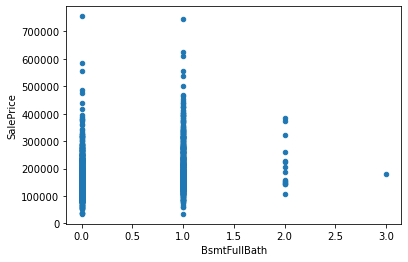

In [59]:
#BsmtFullBath: Basement full bathrooms
train.plot.scatter(x='BsmtFullBath',y='SalePrice')